In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.shape

(200, 5)

In [3]:
df=df.drop(['CustomerID'],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
encode={'Male':1,'Female':0}
df['Gender']=df['Gender'].map(encode)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Text(0, 0.5, 'Spending Score')

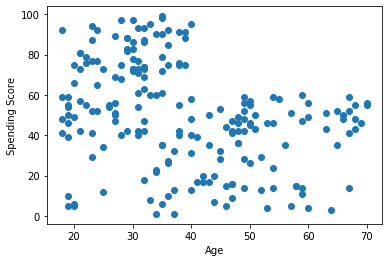

In [6]:
plt.scatter(x=df['Age'],y=df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")

Text(0, 0.5, 'Spending Score')

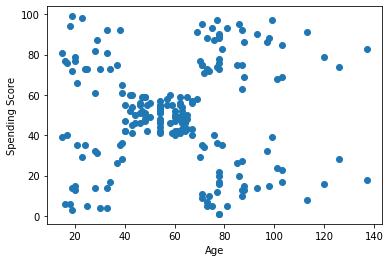

In [7]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")

In [8]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [9]:
# from sklearn.cluster import KMeans
# Kmean = KMeans(n_clusters=2)
# Kmean.fit(df)

In [10]:
# Kmean.cluster_centers_

In [11]:
# df['Label']=Kmean.labels_

In [12]:
df.head(50)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [13]:
# df['Label'].value_counts().plot.bar()

In [14]:
# from sklearn.metrics import silhouette_score
# score=silhouette_score(df, df['Label'])
# print(score)

In [15]:
X=df.drop(['Gender','Age'],axis=1)

In [16]:
from sklearn.cluster import DBSCAN
clu=DBSCAN(eps=3,min_samples=4)
clu.fit(X)

DBSCAN(eps=3, min_samples=4)

In [17]:
X['Label1']=clu.labels_
X['Label1'].value_counts()

-1    121
 2     28
 1     15
 0     10
 4      6
 8      4
 7      4
 6      4
 5      4
 3      4
Name: Label1, dtype: int64

In [18]:
X.head()

,Annual Income (k$),Spending Score (1-100),Label1
0,15,39,-1
1,15,81,-1
2,16,6,-1
3,16,77,-1
4,17,40,-1


Text(30.547899305555568, 0.5, 'Spending Score')

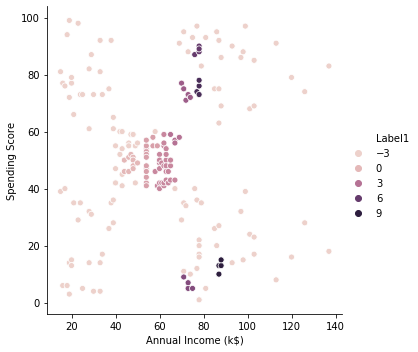

In [25]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=X,hue='Label1')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")